In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dcst as dcst
sns.set()

 ## Question 1.a Newman 7.2
 The question asks us to download and read in the number of sunspots since 1749. We will then graph them as a function of time. I will explain in more detail for part B and C when we perform Fourier Analysis on this data. 

### 7.3A

In [34]:
a_sunspot_data = np.loadtxt('sunspots.txt')
a_date = a_sunspot_data[:,0]   # The date in months since 1749
a_sun_num = a_sunspot_data[:,1]  # the number of sunspots observed that month


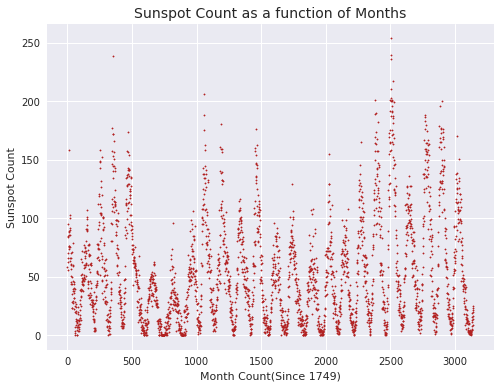

In [35]:
plt.figure(figsize = (8,6))
plt.scatter(a_date,a_sun_num, c = 'firebrick', s = 2)
plt.title('Sunspot Count as a function of Months', fontsize = (14))
plt.xlabel('Month Count(Since 1749)')
plt.ylabel('Sunspot Count')
plt.show()

#### Reflection
The visual estimate of the period 4 periods for every 500 months, which means a period every 120 months or once every 10 years. If we have lots of extra time, we could fit this with a sinosouidal function and get a better estimate, but the question just asks to eyeball

### 7.2 Part B
I will perform a FFT on the sunspot data and plot the magnitude of coefficents ( $|c_k|^2$) as a function of $k$, the *power spectrum* for the signal. This will be able to provide meaningful information for part C. 

In [23]:
# DFT Function taken from Newman as suggested
def DFT(a_array): 
    '''
    This function takes an array and performs a discrete fourier transform
    Input
    a_array: a signal array to be analayzed
    Output
    a_dft_array = dft array that has been calculated
    '''
    N = len(a_array)    # length of input array
    a_dft_array = np.zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            a_dft_array[k] += a_array[n]*np.exp(-2j*np.pi*k*n/N)
    return a_dft_array

### 7.3C

In [36]:
a_fourier = DFT(a_sun_num)
a_power = np.real(a_fourier)**2 + np.imag(a_fourier)**2

(array([24]),)


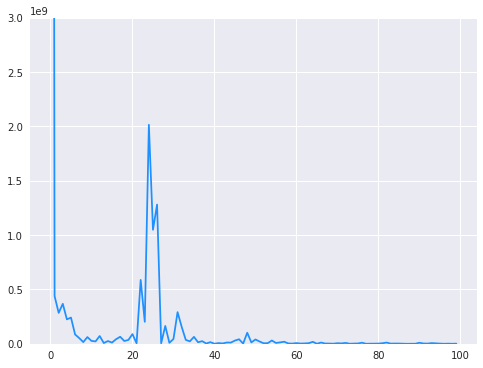

In [37]:
plt.figure(figsize = (8,6))
plt.plot(a_date[:100],a_power[:100], color = 'dodgerblue')
plt.ylim(0,0.3e10)  # shrunk plot so other peaks visible
print(np.where(a_power == np.max(a_power[1:])))  # Finding the largest nonzero peak
plt.show()

### Part C
There is an obvious peak at $k = 24$. This relates to a sinusodal periodicity of _ 

### Question 1 D Exercise 7.3 
This exercise will read in the waveform from an intstrument to be specified and finds out what note it was playing

In [99]:
def NoteFinder(s_instrument, s_title, s_xlabel):
    a_waveform = np.loadtxt(s_instrument)
    a_fourier = np.fft.rfft(a_waveform)
    a_power = np.sqrt(np.real(a_fourier)**2 + np.imag(a_fourier)**2)
    #a_note = np.where(a_power == np.max(a_power))
    epsilon = 0.1*10**8
    ind = np.where(a_power>epsilon)
    ind = min(ind[0])
    sample_rate = 44100
    num_samples = len(a_waveform)
    freq = np.fft.rfftfreq(num_samples, 1./sample_rate)
    plt.plot(freq,a_power)
    plt.xlabel(s_xlabel)
    plt.ylabel('Spectral Power (modulus of fourier coefficients)')
    plt.title(s_title)
    plt.show() 
    a_freq = freq[ind]
    return a_freq
    

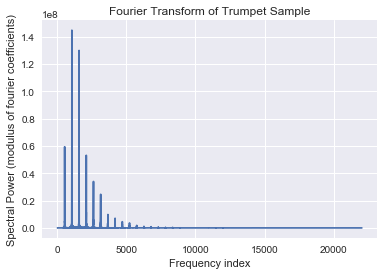

Trumpet max index is 520.821


In [103]:
trumpet_freq = NoteFinder('trumpet.txt', 'Fourier Transform of Trumpet Sample', 'Frequency index')
print('Trumpet max index is '+ str(trumpet_note))

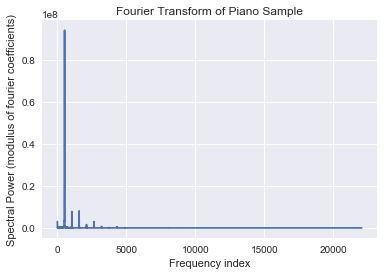

Piano max index is 516.852


In [102]:
piano_freq = NoteFinder('piano.txt', 'Fourier Transform of Piano Sample', 'Frequency index')
print('Piano max index is '+ str(piano_note))

In [101]:
#b) What note?
note_trumpet = np.round(12*np.log2(trumpet_note/440),0)
note_piano = np.round(12*np.log2(piano_note/440),0)
print(note_trumpet)
print(note_piano)

3.0
3.0


Note is C5.

### Newman 7.4 and 7.6
Here we are dealing with Fourier Transforms of the DOW and examining how to smooth complicated signals. We will also examine how to use discrete cosine transformations if our signal is not periodic. 

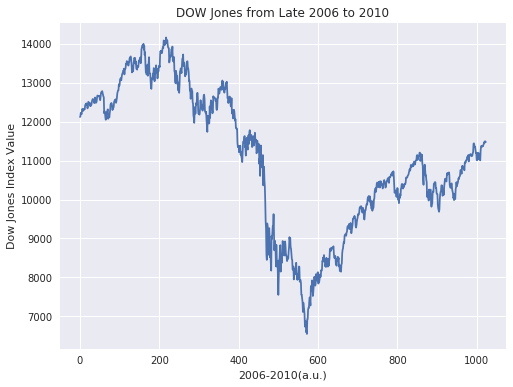

In [48]:
# Part A
a_dow_data = np.loadtxt('dow.txt')  # loading in the data
plt.figure(figsize = (8,6))
plt.plot(a_dow_data) 
plt.title('DOW Jones from Late 2006 to 2010')
plt.xlabel('2006-2010(a.u.)')
plt.ylabel('Dow Jones Index Value')
plt.show()                          # a view of the Dow Data

In [50]:
def Smoother(a_signal_array, i_percent):
    '''
    This function will take as inputs
    a_signal_array: an array of a signal
    i_percent : an integer value of what percent you want to keep
    The function returns
    a_smooth: The smoothed inverse FFT of a_fourier
    '''
    a_fourier = np.fft.rfft(a_signal_array)  # performing FFT
    i_divider = 100//i_percent               # calculating the cutoff percentage
    i_remain = len(a_fourier)//i_divider     # index for values not being set to zero
    a_fourier[i_remain:] = 0                 # setting the values to zero
    a_smooth = np.fft.irfft(a_fourier)       # inverse transform with smoothed values
    return a_smooth

In [51]:
a_dow_inverse = Smoother(a_dow_data, 10)     # applying the smoothing algorithim

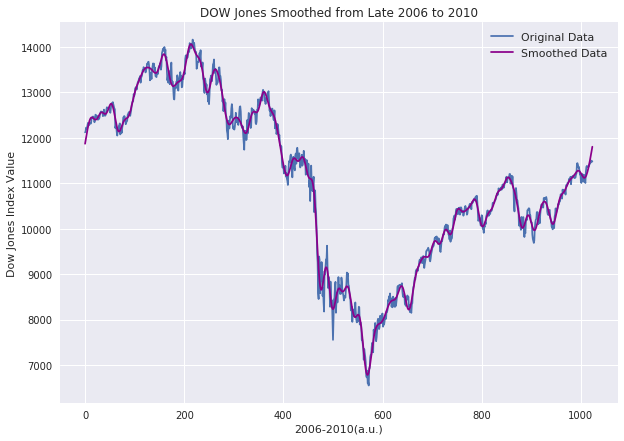

In [68]:
plt.figure(figsize = (10,7))
plt.plot(a_dow_data, label = 'Original Data')
plt.plot(a_dow_inverse, c = 'darkmagenta', label = 'Smoothed Data')   # manually changed colour so more visible
plt.title('DOW Jones Smoothed from Late 2006 to 2010')
plt.xlabel('2006-2010(a.u.)')
plt.ylabel('Dow Jones Index Value')
plt.legend(fontsize = 11)
plt.show()

In [63]:
# part E
# for 2%
a_dow_smooth = Smoother(a_dow_data, 2)

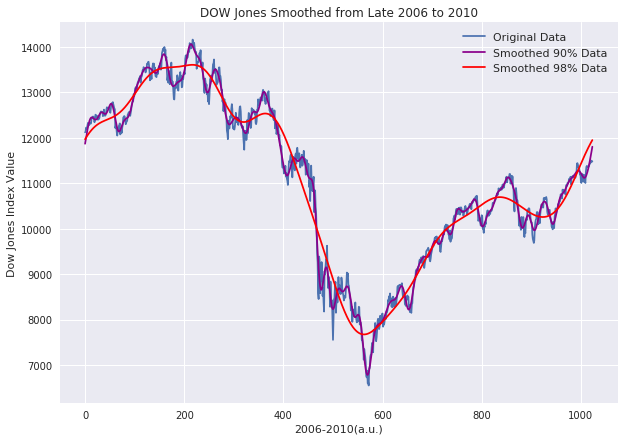

In [71]:
plt.figure(figsize = (10,7))
plt.plot(a_dow_data, \
        label = 'Original Data')
plt.plot(a_dow_inverse, c = 'darkmagenta', \
         label = 'Smoothed 90% Data')
plt.plot(a_dow_smooth2,  c = 'red',\
         label = 'Smoothed 98% Data')
plt.title('DOW Jones Smoothed from Late 2006 to 2010')
plt.xlabel('2006-2010(a.u.)')
plt.ylabel('Dow Jones Index Value')
plt.legend(fontsize = 11)
plt.show()

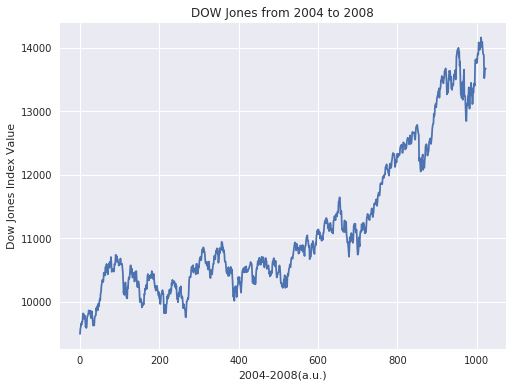

In [94]:
### Exercise 7.6
# Part A
a_new_dow = np.loadtxt('dow2.txt')
plt.figure(figsize = (8,6))
plt.plot(a_new_dow)
plt.title('DOW Jones from 2004 to 2008')
plt.xlabel('2004-2008(a.u.)')
plt.ylabel('Dow Jones Index Value')
plt.show()

In [79]:
# 7.6
a_new_inverse = Smoother(a_new_dow, 2)

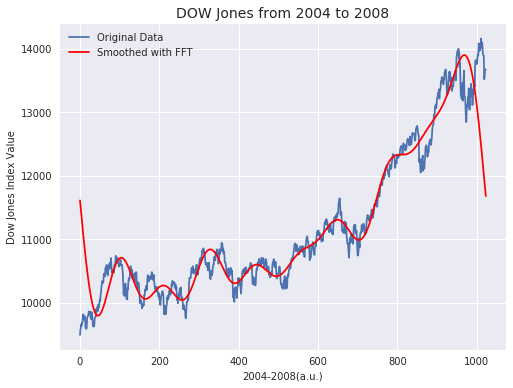

In [98]:
plt.figure(figsize = (8,6))
plt.plot(a_new_dow, \
        label = 'Original Data')
plt.plot(a_new_inverse, c = 'red', \
         label = 'Smoothed with FFT')
plt.title('DOW Jones from 2004 to 2008',fontsize = 14)
plt.xlabel('2004-2008(a.u.)',fontsize = 10)
plt.ylabel('Dow Jones Index Value', fontsize = 10)
plt.legend(fontsize = 10)
plt.show()

### Reflection
Notice the artificats or wings at the beginning and the end of the data, this is an attempt to make it periodic.

In [88]:
# 7.6
def DCT_Smoother(a_signal_array, i_percent):
    '''
    This function will take as inputs
    a_signal_array: an array of a signal
    i_percent : an integer value of what percent you want to keep
    The function returns
    a_smooth: The smoothed inverse FFT of a_fourier
    '''
    a_dct = dcst.dct(a_signal_array)       # performing DCT
    i_divider = 100//i_percent             # Calculating Cutoff percentage
    i_remain = len(a_dct)//i_divider   # index for remaining percent
    a_dct[i_remain:] = 0                   # Setting most values to zero 
    a_smooth = np.fft.irfft(a_dct)         # inverse transformation of smoothed value
    return a_smooth[:len(a_signal_array)]

In [89]:
a_dct_inverse = DCT_Smoother(a_new_dow,2)

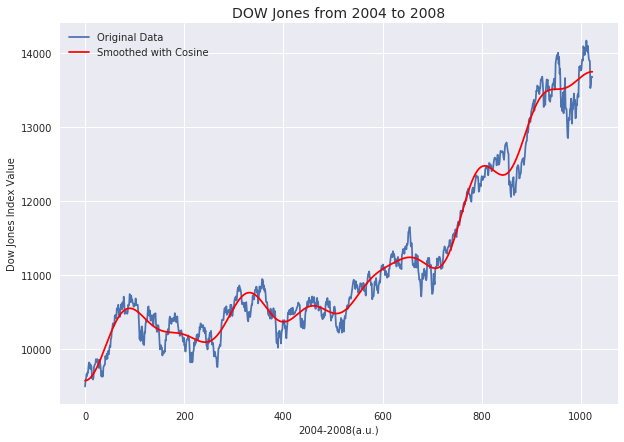

In [100]:
plt.figure(figsize = (10,7))
plt.plot(a_new_dow, \
        label = 'Original Data')
plt.plot(a_dct_inverse,c = 'red', \
         label = 'Smoothed with Cosine')
plt.title('DOW Jones from 2004 to 2008',fontsize = 14)
plt.xlabel('2004-2008(a.u.)',fontsize = 10)
plt.ylabel('Dow Jones Index Value', fontsize = 10)
plt.legend(fontsize = 10)
plt.show()